In [1]:
# Import pandas for data manipulation and numpy for numerical operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file.
df = pd.read_excel('Online_Retail.xlsx')

In [3]:
# Display the first 5 rows to check the data loaded correctly
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Check the shape (rows, columns) of the dataset
df.shape

(541909, 8)

In [5]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# Calculate and display the number of missing values for each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 1. Dataset Shape
Rows: 541,909 transactions (line items)
Columns: 8 features

This is a substantial dataset, giving us a lot of material for meaningful customer segmentation.

### 2. Data Types, Nulls & Structure
Most columns are complete—no missing values in most key transaction info.

Description: 1,454 missing values (very low vs. total size; can be dropped).

CustomerID: 135,080 missing values (quite a lot: about 25% of records!).

Transactions without CustomerID cannot be linked to a customer, so they are problematic for customer-level analysis and K-means clustering.

### 3. Summary Statistics
Quantity & UnitPrice:
Quantity: Range from -80,995 to 80,995
Negative quantities likely mean returns or data errors—should be handled in cleaning.

UnitPrice: Range from -11,062 to 38,970

Negative prices are probably errors or special cases; needs review.

CustomerID: Ranges from 12,346 to 18,287.

### 4. InvoiceDate
Ranges from late 2010 to late 2011, so roughly a year of transactions.

### 5. Missing Values Table
Column	Missing Values
Description	1,454
CustomerID	135,080
Most other columns are fully populated.

In [8]:
# Remove rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

In [9]:
# Remove rows with negative or zero Quantity and UnitPrice
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [10]:
# Remove duplicate rows
df = df.drop_duplicates()

In [11]:
# Convert CustomerID to string type for consistency
df["CustomerID"] = df["CustomerID"].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


# Prepare the data for modelling

RFM Analysis

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [13]:
# Adding new column: Total_Amount
df["Total_Amount"] = df["Quantity"] * df["UnitPrice"]

In [14]:
# R (Recency)
# Computing Max Date
max_date = max(df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
# Compute difference between each transaction and this max date.
df["Date_Difference"] = max_date - df["InvoiceDate"]

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Date_Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
# Calculating the days when the customer last bought something
# Which is basically the minimum value of days when grouped by customer
purchase = df.groupby("CustomerID")["Date_Difference"].min()

In [18]:
purchase = purchase.reset_index()

In [19]:
# Lets's rename the column
purchase.columns = ["CustomerID", "Recency"]

In [20]:
purchase.head()

,CustomerID,Recency
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [21]:
# F (Frequency)
# In frequency we will calculate how many times purchases was made by each customer, so we will groupby customerID and count the InvoiceNo
frequency = df.groupby("CustomerID")["InvoiceNo"].count()

In [22]:
frequency

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4338, dtype: int64

In [23]:
# Since its taking customerID for indexing so we will add the indexing
frequency = frequency.reset_index()

In [24]:
# Lets's rename the column
frequency.columns = ["CustomerID", "Frequency"]

In [25]:
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
# Lets create a new dataframe and merge both Recency and Frequency columns
new_df = pd.merge(purchase, frequency, on="CustomerID", how="inner")

In [27]:
new_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325 days 02:49:00,1
1,12347.0,1 days 20:58:00,182
2,12348.0,74 days 23:37:00,31
3,12349.0,18 days 02:59:00,73
4,12350.0,309 days 20:49:00,17


In [28]:
# M (Monetry)
# Monetry basiclly mean how much each customer spent, we have already calucated the value of each transaction in Total_Amount.
#Now we just have to sum it up grouped by each customer (CustomerID)
monetry = df.groupby("CustomerID")["Total_Amount"].sum()

In [29]:
monetry = monetry.reset_index()

In [30]:
monetry.head()

,CustomerID,Total_Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [31]:
# Now let's merge monetry into new_df
new_df = pd.merge(new_df, monetry, on="CustomerID", how="inner")

In [32]:
new_df.columns = ["CustomerID","Recency", "Frequency", "Monetry"]

In [33]:
new_df.head()

,CustomerID,Recency,Frequency,Monetry
0,12346.0,325 days 02:49:00,1,77183.60
1,12347.0,1 days 20:58:00,182,4310.00
2,12348.0,74 days 23:37:00,31,1797.24
3,12349.0,18 days 02:59:00,73,1757.55
4,12350.0,309 days 20:49:00,17,334.40


For our analysis, I dn't think we need recency in such granular level that we are seeing even the time.

So what we will next do is remove the hours part from the recency column and only keep the number of days.

For that we will use "datetime" library

In [34]:
import datetime as dt

In [35]:
new_df["Recency"] = new_df["Recency"].dt.days

In [36]:
new_df.head()

,CustomerID,Recency,Frequency,Monetry
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


# Next Steps:
1. Outlier Treatment
2. Rescaling

<Axes: ylabel='Recency'>

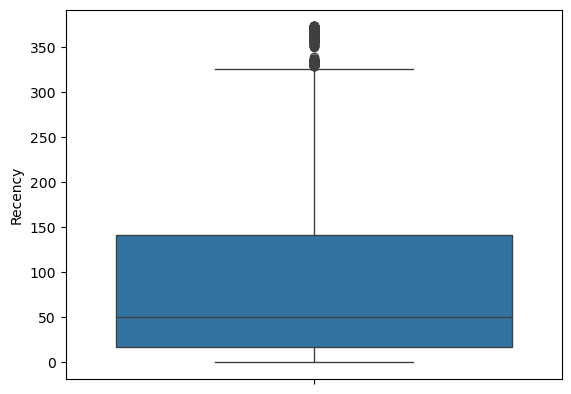

In [37]:
# Outlier Treatment
sns.boxplot(new_df["Recency"])

<Axes: ylabel='Frequency'>

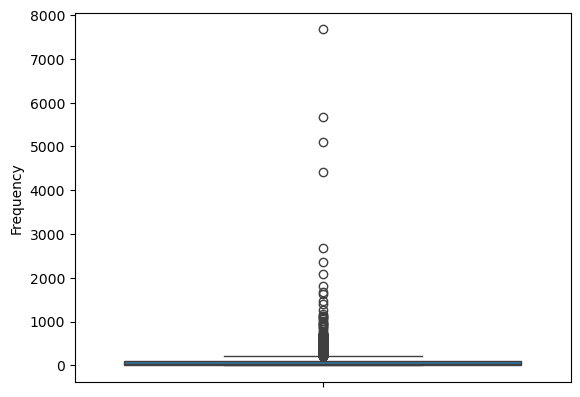

In [38]:
sns.boxplot(new_df["Frequency"])

<Axes: ylabel='Monetry'>

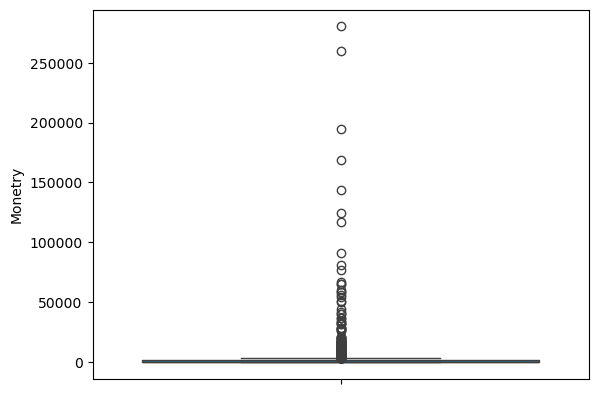

In [39]:
sns.boxplot(new_df["Monetry"])

## Understanding the Boxplots
### Recency
- Interpretation: Lower Recency means customers purchased recently; higher values mean they haven't purchased for a long time.
- Observation: Most customers have Recency values below ~150 days, but there are a few who haven't purchased in over 300 days.
- Business meaning: High Recency isn't “wrong” — it could simply mean they are inactive customers. These are important for further analysis, so removing them might distort the picture.

### Frequency
- Interpretation: Number of transactions per customer.
- Observation: Most customers buy fewer than ~50 times a year, but there are some buying hundreds or thousands of times (very far from the rest).
- Business meaning: High-frequency customers may be wholesalers, bulk buyers, or errors (like duplicated records). These extreme points could bias statistical models and skew averages.

### Monetary
- Interpretation: Total amount a customer spent.
- Observation: Most customers spend below ~5,000, but some spent over 250,000 — very extreme.
- Business meaning: Big spenders are not necessarily “wrong” — they might be loyal VIP customers. But in modeling, these can cause skewness and make results less representative for the majority.

Since our final goal is clustering with K-Means, we need to treat the outliers carefully, because:
1. K-Means is sensitive to extreme values — they can pull centroids toward them, messing up cluster boundaries.

2. Simply deleting them would remove important customer types (like VIPs or churned customers).

3. The best approach here is outlier capping + scaling.

In [40]:
# Caping extreme values
# Instead of removing outliers, cap them at a reasonable percentile range.
# Let's do 5th and 95th percentile for RFM metrics — this removes the extreme pull but keeps the customer in the dataset.
def cap_outliers(df, column, lower_q=0.05, upper_q=0.95):
    lower = df[column].quantile(lower_q)
    upper = df[column].quantile(upper_q)
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

for col in ['Recency', 'Frequency', 'Monetry']:
    new_df = cap_outliers(new_df, col)

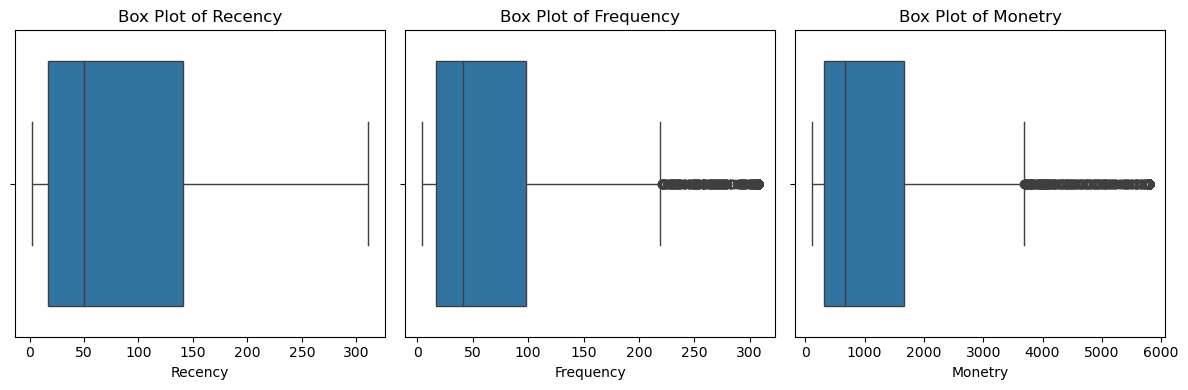

In [41]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(x=new_df["Recency"])
plt.title("Box Plot of Recency")

plt.subplot(1,3,2)
sns.boxplot(x=new_df["Frequency"])
plt.title("Box Plot of Frequency")

plt.subplot(1,3,3)
sns.boxplot(x=new_df["Monetry"])
plt.title("Box Plot of Monetry")

plt.tight_layout()
plt.show()

### Recency
- The range is now much tighter — before, Recency had extreme values over 300 days, but now the whiskers stop around that cap.
- Outliers beyond the upper whisker are gone because we replaced extreme values above the 95th percentile.
- Distribution still shows a natural spread, so we’re keeping both active and inactive customers without letting extremes distort scaling.

### Frequency
- The earlier huge outliers (thousands of purchases) are gone — whiskers now end near your capped limit (around 250–300).
- The spread is still there, so high-frequency buyers are preserved but they won’t pull the cluster centroids far away.
- This helps K-Means balance clusters instead of isolating VIP bulk buyers as their own skewed group.

### Monetary
- Before capping, extreme spenders (₹250k+) were pulling the scale badly. Now the whiskers end near ~6000.
- VIP spenders are still in the data, but capped so their spending doesn’t overpower distance calculations.
- The monetary distribution is still right-skewed, so we might still benefit from a log transformation to further normalize it before clustering.



In [42]:
# Rescaling (Basicalliy converting the 3 variables into a standard scale)
final_df = new_df[["Recency", "Frequency", "Monetry"]]
final_df.head()

,Recency,Frequency,Monetry
0,311.0,4.0,5789.9995
1,2.0,182.0,4310.0000
2,74.0,31.0,1797.2400
3,18.0,73.0,1757.5500
4,309.0,17.0,334.4000


In [43]:
# Importing libraries for rescaling
import sklearn
from sklearn.preprocessing import StandardScaler

In [44]:
# Instanciate the scaler
scaler = StandardScaler()

In [45]:
# Fit_transform
scaled_df = scaler.fit_transform(final_df)

In [46]:
scaled_df

array([[ 2.31495119, -0.85097197,  2.95616111],
       [-0.91941543,  1.30951307,  1.98036435],
       [-0.1657766 , -0.52325794,  0.32364548],
       ...,
       [-0.8670794 , -0.75387152, -0.74392269],
       [-0.90894822,  2.83884517,  0.48734863],
       [-0.50072719, -0.04989325,  0.35004475]])

In [47]:
scaled_df.shape

(4338, 3)

# Modeling

In [48]:
# Lets first convert the numpy array into dataframes
scaled_df = pd.DataFrame(scaled_df)

In [49]:
scaled_df.head()

,0,1,2
0,2.314951,-0.850972,2.956161
1,-0.919415,1.309513,1.980364
2,-0.165777,-0.523258,0.323645
3,-0.751940,-0.013481,0.297477
4,2.294017,-0.693184,-0.640838


In [50]:
# Renaming the columns
scaled_df.columns = ["Recency", "Frequency", "Monetry"]
scaled_df.head()

,Recency,Frequency,Monetry
0,2.314951,-0.850972,2.956161
1,-0.919415,1.309513,1.980364
2,-0.165777,-0.523258,0.323645
3,-0.751940,-0.013481,0.297477
4,2.294017,-0.693184,-0.640838


In [51]:
# Importing library
from sklearn.cluster import KMeans

In [52]:
# We'll begin by selecting an arbitrary value for K to generate some initial clusters. After that, we'll determine and use the optimal number of clusters (K) for the analysis.
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [53]:
kmeans.labels_

array([2, 0, 1, ..., 1, 0, 3])

## Finding the optimal number of clusters

In [54]:
# Elbow Curve/ Sum of Squared Distances
# First we will define the range of clusters that we want to experiment with
WCSS = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(scaled_df)

    WCSS.append(kmeans.inertia_)

WCSS

[6824.110917547942,
 3668.9754604442423,
 2768.9637078268725,
 2360.301135215091,
 1997.8126545080877,
 1613.387002278729,
 1457.4673175521762,
 1320.4737802015252]

Each value in the WCSS represents the sum of squared distances within each cluster for the corresponding number of clusters, ranging from 2 to 10. 

We are starting with 2 clusters because just 1 cluster does not really make much sense in this case.

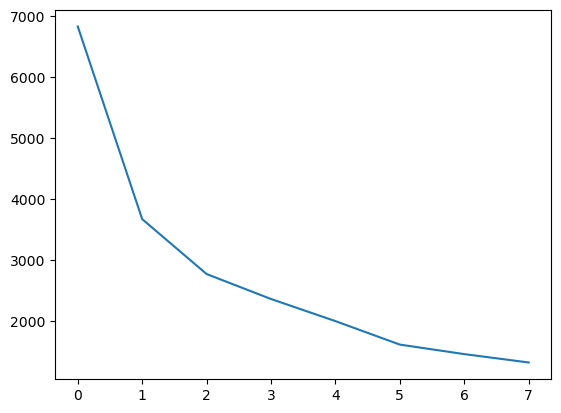

In [55]:
# Plotting the SSDs for each n_clusters
plt.plot(WCSS)

- Each point on the X-axis corresponds to the number of clusters we experimented with—where 0 indicates 2 clusters, 1 represents 3 clusters, and so on.

- For example, if we compare the WCSS between 2 and 3 clusters, we see that adding a third(1 in X-axis) cluster after two(0 in X-axis) leads to a noticeable decrease in WCSS. However, adding more clusters beyond 3 does not significantly reduce the WCSS value. This suggests that increasing the number of clusters past 3 may not offer substantial improvement and could be unnecessary.

##### Interpretation: As k increases, WCSS decreases — because more clusters naturally fit data better.

But after a point, the improvement slows down.

The "elbow point" (like the bend in an arm) is where adding more clusters doesn’t improve WCSS significantly.

Example: If the elbow occurs at k = 3, it means:

"Using 3 clusters balances compactness and simplicity. Adding more clusters won’t improve the model significantly."

# Run K-Means Clustering

In [159]:
# Final Model with K=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [160]:
kmeans.labels_

array([0, 1, 2, ..., 2, 1, 2])

In [161]:
# Assign labels to each CustomerID
new_df["ClusterId"] = kmeans.labels_

In [162]:
new_df.head()

,CustomerID,Recency,Frequency,Monetry,ClusterId
0,12346.0,311.0,4.0,5789.9995,0
1,12347.0,2.0,182.0,4310.0000,1
2,12348.0,74.0,31.0,1797.2400,2
3,12349.0,18.0,73.0,1757.5500,2
4,12350.0,309.0,17.0,334.4000,0


# Identify Customer Segmentation

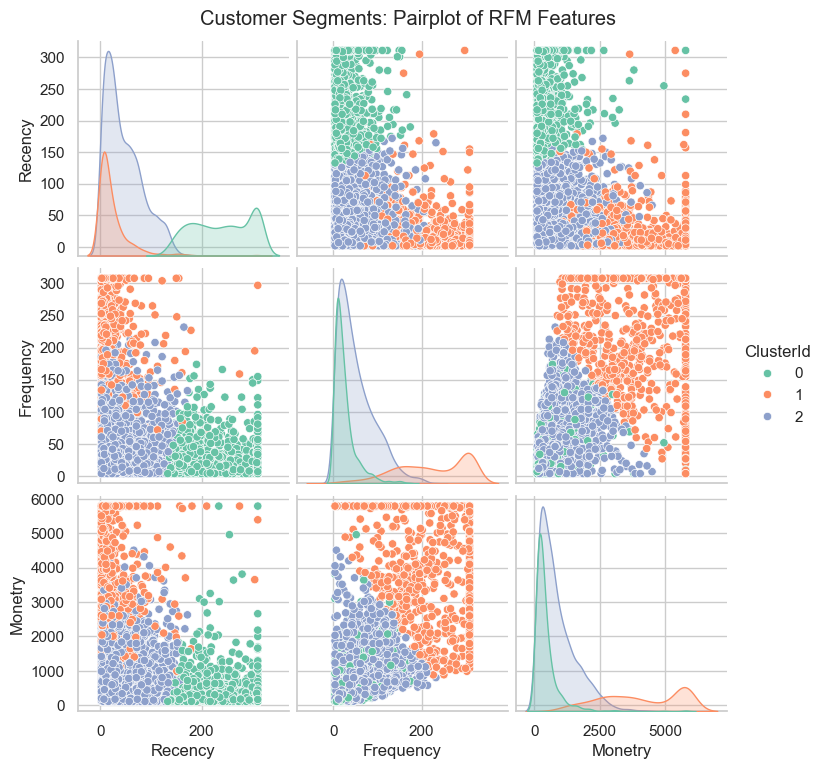

In [166]:
# Visualisation by Pairplot
rfm_pairplot = new_df[['Recency', 'Frequency', 'Monetry', 'ClusterId']]

# Set a pastel style
sns.set(style="whitegrid", palette="pastel")

# Create the pairplot
sns.pairplot(
    rfm_pairplot,
    hue='ClusterId',
    palette='Set2',  # pastel-like colors
    diag_kind='kde',
    height=2.5
)

plt.suptitle('Customer Segments: Pairplot of RFM Features', y=1.02)
plt.show()

<Axes: xlabel='ClusterId', ylabel='Recency'>

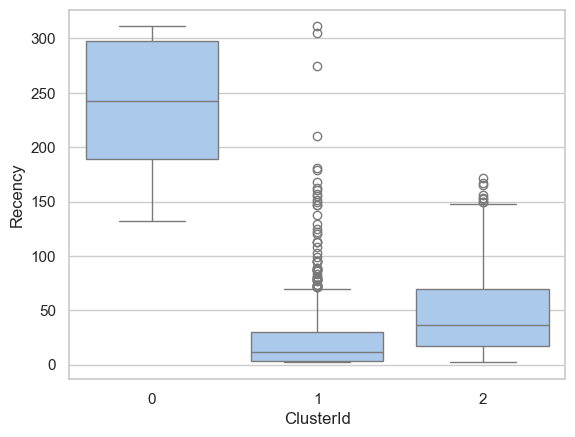

In [163]:
sns.boxplot(x="ClusterId", y="Recency", data=new_df)

Boxplot Insights

1. Cluster 0
- High Recency Values: The median is high, and the entire box (middle 50% of values) is at the high end of the Recency scale.
- Summary: These customers haven't purchased in a long time.
- Implication: This group is the least engaged/inactive segment. They are at risk of churn.

2. Cluster 1
- Low Recency Values: The median and middle spread are at the lowest end; most customers in this cluster made very recent purchases.
- Summary: This is your most engaged/active customer segment—they shop frequently and recently.
- Implication: Ideal for loyalty and retention programs. Focus your marketing and cross-sell efforts here.

3. Cluster 2
- Moderate Recency: Median and spread fall between Clusters 0 and 1.
- Summary: These customers purchased more recently than Cluster 0 but not as recently as Cluster 1.
- Implication: They could be nurtured to become more active. Good segment for win-back or targeted promotions.

<Axes: xlabel='ClusterId', ylabel='Frequency'>

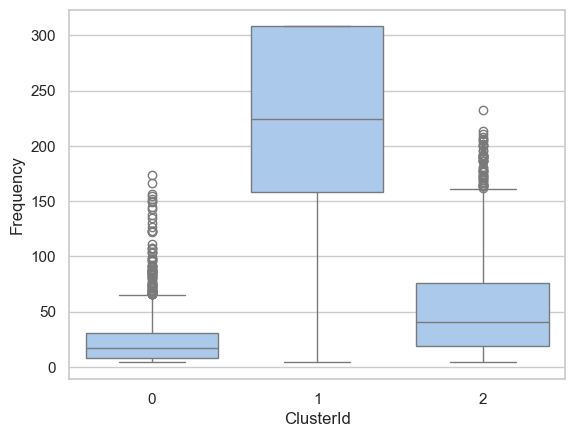

In [164]:
sns.boxplot(x="ClusterId", y="Frequency", data=new_df)

Boxplot Insights

1. Cluster 0
- Median Frequency: Very low, indicating that most customers in this cluster have low engagement or make few purchases.
- Spread: The box is tightly clustered at the lower end, showing the majority have small frequencies.
- Outliers: Many outliers with significantly higher frequencies, meaning there are a few exceptionally frequent users in this group, but they are rare.
- Interpretation: Cluster 0 represents mostly inactive or infrequent customers, with a handful of very active ones.

2. Cluster 1
- Median Frequency: Quite high – much higher than Clusters 0 and 2. The middle 50% of values are all at the higher end.
- Spread: Wide box, covering high frequencies; this cluster has the most consistent and frequent activity.
- Outliers: Some lower-frequency outliers, but overall, the majority are active.
- Interpretation: Cluster 1 is the segment with the most active customers. Most marketing and up-selling potential lies here.

3. Cluster 2
- Median Frequency: Moderate, higher than Cluster 0 but lower than Cluster 1.
- Spread: Frequency values show a moderate spread. There are quite a few outliers toward the higher end, suggesting some potential super-users.
- Interpretation: Cluster 2 represents occasionally active customers—higher engagement than Cluster 0, but not at the level of Cluster 1.

<Axes: xlabel='ClusterId', ylabel='Monetry'>

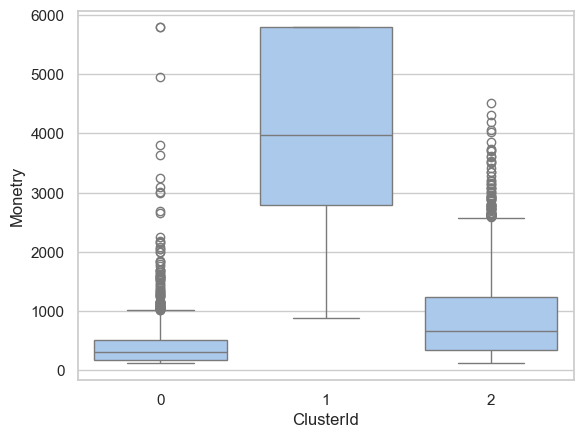

In [165]:
sns.boxplot(x="ClusterId", y="Monetry", data=new_df)

Boxplot Insights
1. Cluster 0
- Median spending: Lowest among all clusters.
- Spread: Spending amounts are tightly clustered at the lower range, frequent small spenders.
- Outliers: There are quite a few outliers, but the main box (middle 50% of values) is still quite low.
- Interpretation: Customers in this cluster generally spend less, but there are a few with very high transactions.

2. Cluster 1
- Median spending: Highest, with much of the data concentrated in a higher range of monetary value.
- Spread: This cluster has the broadest spread, indicating these customers spend a great deal more – both on average and at the maximum.
- Outliers: Fewer visible outliers compared to Cluster 0, suggesting high spending is common among this segment.
- Interpretation: This is your top-spending customer segment. Retaining or rewarding these customers would be highly valuable.

3. Cluster 2
- Median spending: Moderate, higher than Cluster 0 but much lower than Cluster 1.
- Spread: The spending range is wider than Cluster 0, but not as broad as Cluster 1.
- Outliers: There are many outliers with relatively high spending values.
- Interpretation: These are mid-value customers—they spend more than Cluster 0, but are not on the level of Cluster 1.

In [167]:
# Assign Cluster Labels to Original Data

original_df = df.merge(new_df[['CustomerID', 'ClusterId']], on='CustomerID', how='left')

In [168]:
original_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Date_Difference,ClusterId
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,1


In [169]:
# Analyze Each Segment

# Summary stats by cluster
cluster_summary = new_df.groupby('ClusterId')[['Recency', 'Frequency', 'Monetry']].agg(['mean', 'median', 'std']).round(2)
print(cluster_summary)

          Recency               Frequency                Monetry           \
             mean median    std      mean median    std     mean   median   
ClusterId                                                                   
0          239.26  242.0  56.44     25.33   17.0  25.59   440.15   306.64   
1           24.15   12.0  34.48    220.60  224.0  80.49  4040.13  3977.72   
2           45.80   36.0  36.29     52.01   41.0  41.49   875.27   668.50   

                    
               std  
ClusterId           
0           506.55  
1          1505.11  
2           702.15  


In [173]:
# Get cluster centers
centroids = kmeans.cluster_centers_

# Reverse transform to original scale
centroids_orig = scaler.inverse_transform(centroids)

print(centroids_orig.shape)

(3, 3)


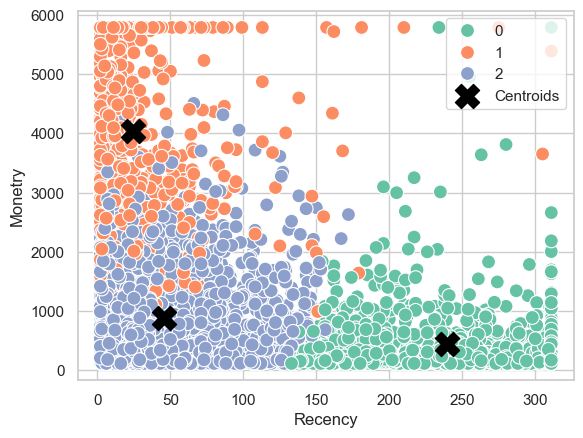

In [175]:
# Plot
sns.scatterplot(x='Recency', y='Monetry', hue='ClusterId', data=new_df, palette='Set2', s=100)
plt.scatter(centroids_orig[:, 0], centroids_orig[:, 2], c='black', marker='X', s=300, label='Centroids')
plt.legend()
plt.show()

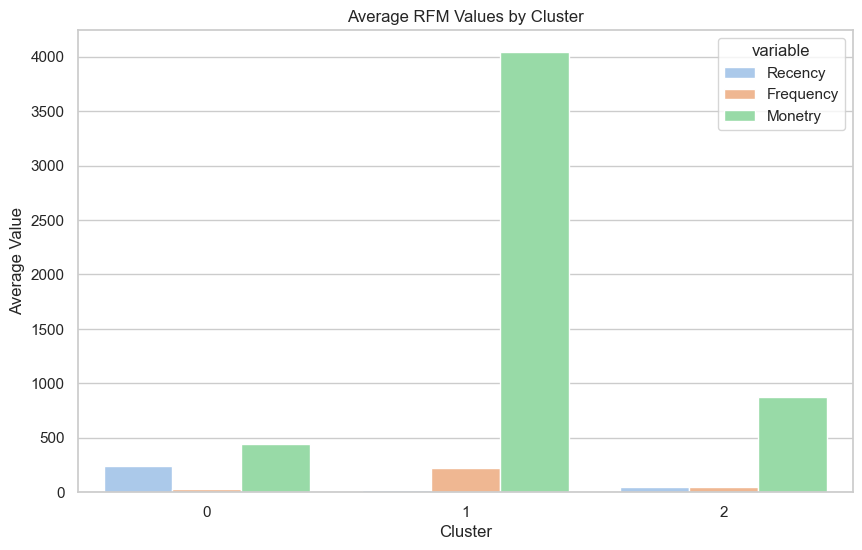

In [170]:
cluster_summary = new_df.groupby('ClusterId').mean(numeric_only=True).reset_index()

# Melt for barplot
rfm_melt = cluster_summary.melt(id_vars='ClusterId', value_vars=['Recency', 'Frequency', 'Monetry'])

plt.figure(figsize=(10, 6))
sns.barplot(x='ClusterId', y='value', hue='variable', data=rfm_melt, palette='pastel')
plt.title('Average RFM Values by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.show()

# Conclusive Summary & Recommendations

Based on the analysis of the Recency, Frequency, and Monetary (RFM) metrics across three customer clusters:

## Segment Overview

| Cluster | Recency (R)     | Frequency (F) | Monetary (M) | Segment Type           | Current Value |
|---------|-----------------|---------------|--------------|-----------------------|---------------|
| **0**   | High (haven’t purchased in long time) | Low           | Low          | **At-risk / Inactive**  | Low           |
| **1**   | Low (recent purchases)                | High          | High         | **Loyal & High-value**  | Very High      |
| **2**   | Moderate                              | Medium        | Medium       | **Potential Growth / Mid-value** | Medium   |

---

## Actionable Insights for Stakeholders

### Cluster 1 – Loyal & High-Value Customers (Keep & Grow)
- **Importance:** These are the most engaged, frequent shoppers who spend the most.
- **Opportunities:**
    - Strengthen brand loyalty with **exclusive benefits** (early access to sales, VIP tiers, personalized offers).
    - Implement **cross-sell and up-sell tactics** since they already trust the brand.
    - Gather **customer feedback** to improve product/service offerings; their opinion carries strong influence.
- **Key Action:** Make them brand advocates by sustaining their engagement and rewarding loyalty.

---

### Cluster 2 – Mid-Value Customers (Nurture & Convert)
- **Importance:** They buy somewhat regularly and spend moderately—they could be moved toward Cluster 1.
- **Opportunities:**
    - Offer **targeted promotions** to encourage more frequent purchases (e.g., bundle deals, limited-time offers).
    - Introduce **personalized recommendations** using previous purchase data.
    - Use **remarketing campaigns** to bring them back before engagement drops.
- **Key Action:** Push them toward high-value behavior through incentives and personalized experiences.

---

### Cluster 0 – At-risk / Inactive Customers (Win-back or Let Go)
- **Importance:** Low frequency, low spend, purchased long ago—least valuable segment today.
- **Opportunities:**
    - **Win-back campaigns**: Special “We miss you” discounts, time-sensitive offers, or new product announcements.
    - Identify why they disengaged (price, product variety, competition, poor service).
    - If acquisition and retention cost outweighs potential return, focus resources on higher-value clusters.
- **Key Action:** Attempt recovery – but prioritize **cost-efficient reactivation strategies**.

---

## Recommendations for Business to Improve Experience & Repeat Purchases

1. **Personalized Engagement Strategies**
    - Use segmentation to design **cluster-specific campaigns**.
    - Communicate via preferred channels (email, SMS, app notifications) for each segment.

2. **Loyalty & Retention Programs**
    - Introduce a **tiered loyalty program** with rewards increasing based on spending and engagement.
    - Offer Cluster 1 top-tier perks; allow Cluster 2 an attainable pathway to reach them.

3. **Reactivation Plans**
    - For Cluster 0: Time-limited discounts, product trial offers, and re-engagement email campaigns.
    - Consider seasonal campaigns to pull them back into shopping cycles.

4. **Upsell & Cross-sell Initiatives**
    - For Cluster 1 and Cluster 2: Use **recommendation engines** and curated bundles.
    - Position premium products or add-ons during checkout.

5. **Customer Feedback & Experience Enhancement**
    - Routinely collect satisfaction feedback from Cluster 1 (loyal customers) and Cluster 2 (growth customers) to improve offerings.
    - Address pain points that might be causing churn in Cluster 0.

6. **Monitor Movement Between Clusters**
    - Track how customers transition between clusters over time to measure marketing effectiveness.
    - Adjust strategies dynamically as segments evolve.

---

### Final Note for Stakeholders

By leveraging these insights, the business can **protect its top customers**, **grow the middle tier**, and **cost-effectively recover lost ones**, leading to **increased repeat purchases, better customer satisfaction, and long-term revenue growth**.  
The key is **precision targeting**—matching actions to the needs and potential of each cluster rather than using one-size-fits-all campaigns.

